## Full model cross-lingual representation similarity

In [1]:
%load_ext autoreload
%autoreload 2

# Change working directory to root of the repo
import os

print(os.getcwd())
os.chdir("..")
os.getcwd()

/home/paulius/projects/cross-lingual-subnetworks/scripts


'/home/paulius/projects/cross-lingual-subnetworks'

In [2]:
import matplotlib.pyplot as plt

font_config = {"size": 14}
plt.rc("font", **font_config)

## Sanity checks

1. Does CKA give a low score for non-parallel (random) sentence encodings?

In [3]:
def shuffle_encoding_dict(x):
    new_dict = {}
    rand_idx = torch.randperm(len(x[0]))
    for layer_id, vals in x.items():
        new_dict[layer_id] = vals[rand_idx]
    return new_dict

In [8]:
# Fake encodings for debugging
import torch

check_dict = {
    "en": {
        "finetuned": torch.load("encodings_full/Experiments.XLMR_MLM_FINETUNED/en.pt"),
    },
    "es": {
        "finetuned": torch.load("encodings_full/Experiments.XLMR_MLM_FINETUNED/es.pt"),
    },
    "zh": {
        "finetuned": torch.load("encodings_full/Experiments.XLMR_MLM_FINETUNED/zh.pt"),
    },
}

check_dict["en_rand"] = {}
check_dict["en_rand"]["finetuned"] = shuffle_encoding_dict(
    check_dict["en"]["finetuned"]
)
check_dict["es_rand"] = {}
check_dict["es_rand"]["finetuned"] = shuffle_encoding_dict(
    check_dict["es"]["finetuned"]
)
check_dict["zh_rand"] = {}
check_dict["zh_rand"]["finetuned"] = shuffle_encoding_dict(
    check_dict["zh"]["finetuned"]
)

,en_finetuned-en_finetuned,en_finetuned-es_finetuned,en_finetuned-zh_finetuned,en_finetuned-en_rand_finetuned,en_finetuned-es_rand_finetuned,en_finetuned-zh_rand_finetuned
0,1.0,0.677451,0.549545,0.007362,0.007860,0.005859
1,1.0,0.743340,0.533614,0.005131,0.005667,0.003681
2,1.0,0.776350,0.588283,0.004809,0.005033,0.003569
3,1.0,0.794816,0.619501,0.004644,0.004591,0.003409
4,1.0,0.822638,0.645318,0.004908,0.005033,0.003552
5,1.0,0.822266,0.654687,0.004840,0.004978,0.003627
6,1.0,0.832592,0.673189,0.005016,0.005104,0.003778
7,1.0,0.837591,0.675046,0.004992,0.005104,0.004044
8,1.0,0.835763,0.671744,0.004783,0.004822,0.003899
9,1.0,0.790331,0.635892,0.003475,0.003351,0.003021


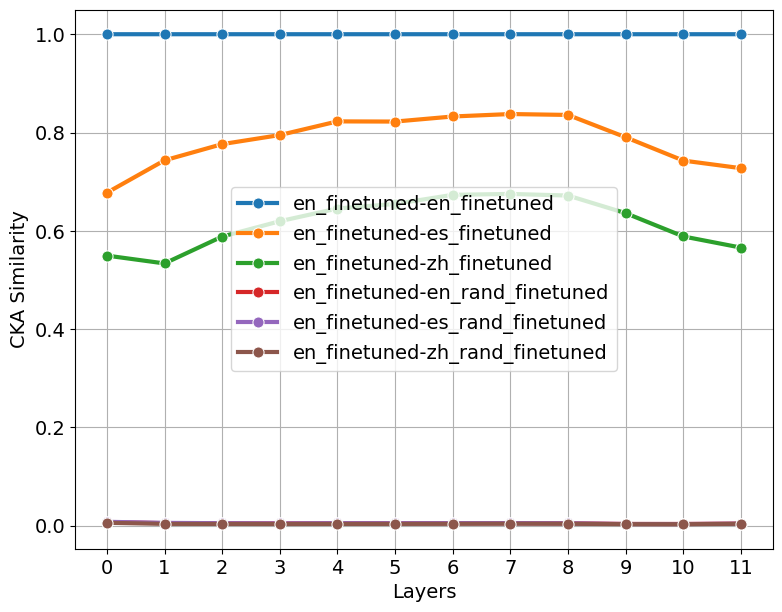

In [12]:
from cross_lingual_subnets.visualization import cka_layer_by_layer

cka_layer_by_layer(
    full_sub=check_dict,
    exp_name1="finetuned",
    exp_name2="finetuned",
    source="en",
    savename=f"cka_sanity_check.pdf",
    legend=True,
    figsize=(9, 7),
)

In [ ]:
# Free up RAM
del check_dict

In [5]:
import torch

rand_dict = {
    "en": {
        "finetuned": torch.load("encodings_full/Experiments.XLMR_MLM_FINETUNED/en.pt"),
        "rand": torch.load("encodings_full/Experiments.XLMR_RANDOM/en.pt"),
    },
    "es": {
        "rand": torch.load("encodings_full/Experiments.XLMR_RANDOM/es.pt"),
    },
    "ru": {
        "rand": torch.load("encodings_full/Experiments.XLMR_RANDOM/ru.pt"),
    },
    "de": {
        "rand": torch.load("encodings_full/Experiments.XLMR_RANDOM/de.pt"),
    },
    "hi": {
        "rand": torch.load("encodings_full/Experiments.XLMR_RANDOM/hi.pt"),
    },
    "ar": {
        "rand": torch.load("encodings_full/Experiments.XLMR_RANDOM/ar.pt"),
    },
    "zh": {
        "rand": torch.load("encodings_full/Experiments.XLMR_RANDOM/zh.pt"),
    },
}

,en_finetuned-es_rand,en_finetuned-ru_rand,en_finetuned-de_rand,en_finetuned-hi_rand,en_finetuned-ar_rand,en_finetuned-zh_rand
0,0.587430,0.528489,0.546869,0.522980,0.535035,0.517618
1,0.598901,0.554690,0.565696,0.535110,0.558659,0.547263
2,0.595936,0.551313,0.554531,0.526711,0.551602,0.544412
3,0.567359,0.530505,0.529177,0.498530,0.522937,0.523335
4,0.567670,0.539270,0.540333,0.503080,0.522904,0.533464
5,0.523133,0.500050,0.501925,0.462304,0.484898,0.507510
6,0.495440,0.472000,0.476337,0.439753,0.459979,0.486514
7,0.480675,0.456229,0.463529,0.425793,0.444985,0.472217
8,0.453669,0.427925,0.435759,0.400060,0.418981,0.452834
9,0.459421,0.443762,0.447121,0.398660,0.437888,0.467824


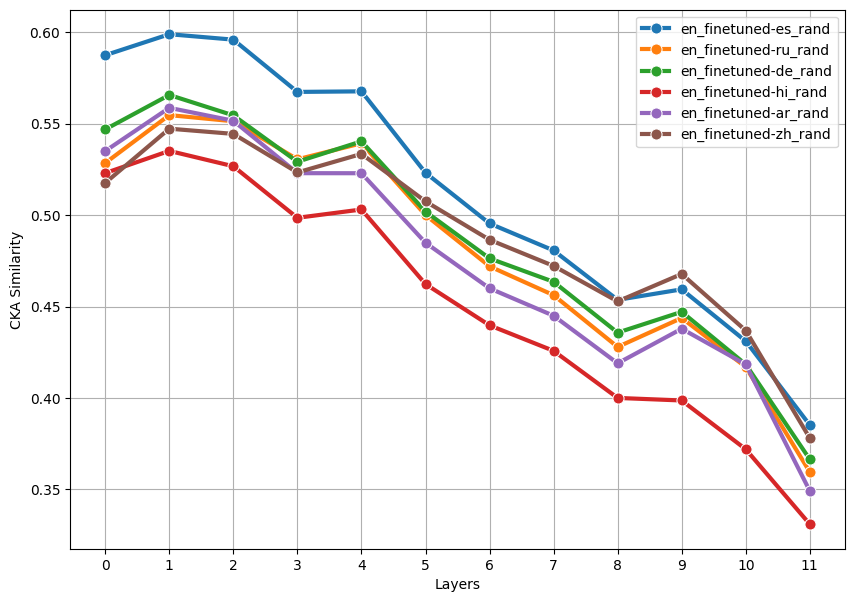

In [6]:
from cross_lingual_subnets.visualization import cka_layer_by_layer

cka_layer_by_layer(
    full_sub=rand_dict,
    exp_name1="finetuned",
    exp_name2="rand",
    source="en",
    savename=f"cka_random.pdf",
    legend=True,
)

In [ ]:
# Free up RAM
del rand_dict

It seems CKA encodes some semantic similarity!

2. Does CKA work? Is the same model similar to itself? And give 1 for the same encodings on the same layers?

In [3]:
from cross_lingual_subnets.visualization import load_encodings

PATH_TO_SUB_ENCODINGS = "encodings_50/"
PRUNED_PCTG = PATH_TO_SUB_ENCODINGS.split("_")[1][:-1]
PATH_TO_FULL_ENCODINGS = "encodings_full/"
full_sub = load_encodings(
    path_to_sub_encodings=PATH_TO_SUB_ENCODINGS,
    path_to_full_encodings=PATH_TO_FULL_ENCODINGS,
    max_length=None,
)

In [ ]:
# from cross_lingual_subnets.visualization import cka_cross_layer

# # Sanity check: is the same model similar to itself?
# cka_cross_layer(
#     full_sub["en"]["base"],
#     full_sub["en"]["base"],
#     xlabel="base",
#     ylabel="base",
# )

## How damaging was pruning to the representations of the same languages?

Ideally, we want representations of the pruned models to be similar to the representations of the full model. Specifically, compare representations of english sentences produced by the full model and the representations of english sentences produced by the english subnetwork. 

### Look at a single language

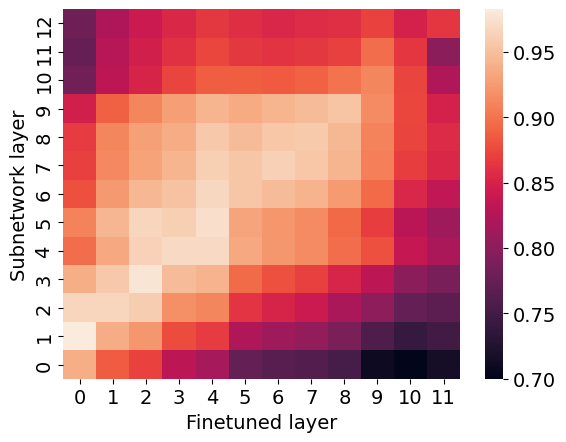

In [4]:
from cross_lingual_subnets.visualization import cka_cross_layer

cka_cross_layer(
    full_sub["en"]["finetuned"],
    full_sub["en"]["sub"],
    xlabel="Finetuned",
    ylabel="Subnetwork",
    savename=f"cka_en_full_vs_{PRUNED_PCTG}_sub.pdf",
)

### Look at all language pairs

/home/paulius/projects/cross-lingual-subnetworks/cross_lingual_subnets/visualization.py:186: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, 0.9, 1])


,0,1,2,3,4,5,6,7,8,9,10,11
12,0.776262,0.629834,0.694055,0.735884,0.742276,0.752513,0.748840,0.754443,0.754801,0.717798,0.733790,0.781981
11,0.780163,0.657631,0.733114,0.766404,0.764392,0.766144,0.774143,0.772537,0.775858,0.765248,0.788307,0.726413
10,0.833633,0.709300,0.792086,0.830543,0.832107,0.839196,0.847830,0.847684,0.846323,0.823119,0.835431,0.793764
9,0.858471,0.745812,0.830624,0.866405,0.873474,0.876823,0.888151,0.887000,0.882779,0.853542,0.859836,0.809655
8,0.878244,0.762632,0.851424,0.883422,0.885676,0.884809,0.896283,0.890423,0.881867,0.863899,0.871920,0.808006
7,0.884635,0.777489,0.869290,0.899166,0.900880,0.897412,0.912355,0.899012,0.888996,0.876782,0.882192,0.806068
6,0.904188,0.788067,0.879582,0.908524,0.910396,0.905997,0.912821,0.898874,0.885689,0.865297,0.869768,0.810250
5,0.901247,0.795912,0.887330,0.913036,0.914243,0.900635,0.907811,0.891896,0.877860,0.857482,0.862419,0.798515
4,0.908924,0.798156,0.888545,0.920374,0.921865,0.912409,0.915661,0.902019,0.889283,0.862642,0.867963,0.817535
3,0.927280,0.813861,0.899217,0.918776,0.920087,0.908164,0.914269,0.898722,0.885503,0.860511,0.864581,0.814283


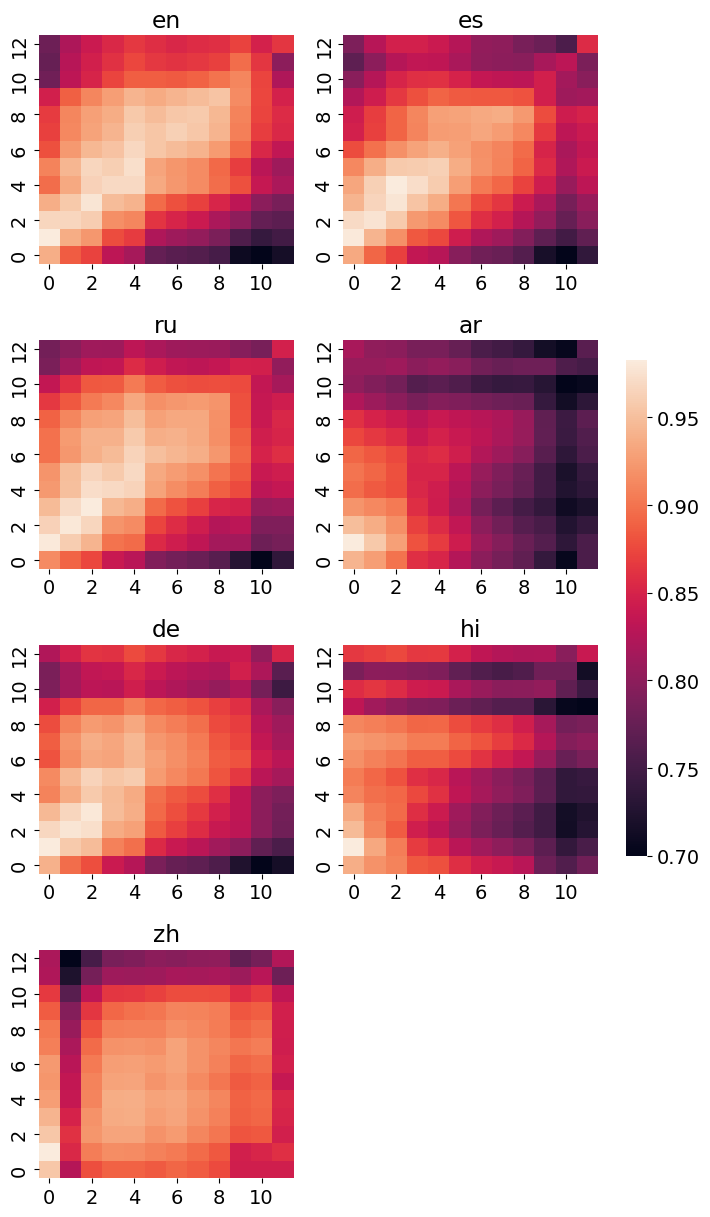

In [ ]:
# from cross_lingual_subnets.visualization import cka_cross_layer_all_languages

# cka_cross_layer_all_languages(
#     full_sub=full_sub,
#     xlabel="Full",
#     ylabel="Subnetwork",
#     exp_name1="finetuned",
#     exp_name2="sub",
#     savename=f"cka_full_vs_{PRUNED_PCTG}_sub_all_langs.pdf",
# )

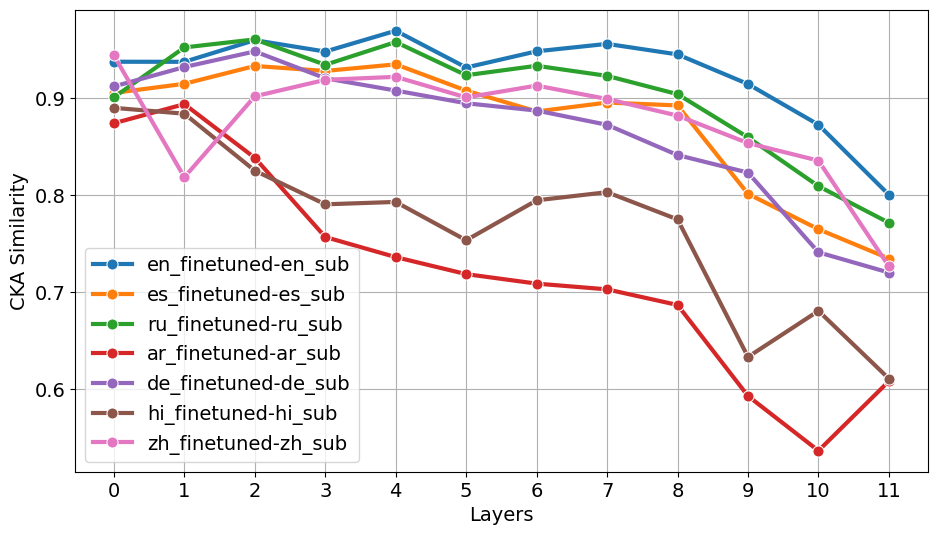

In [5]:
from cross_lingual_subnets.visualization import cka_layer_by_layer

full_sub_same_layer_df = cka_layer_by_layer(
    full_sub=full_sub,
    exp_name1="finetuned",
    exp_name2="sub",
    source=None,
    savename=f"cka_full_vs_{PRUNED_PCTG}_sub_same_langs.pdf",
    legend=True,
    # title=f"Full vs {PRUNED_PCTG}% subnetwork similarity over layers",
    figsize=(11, 6),
)
full_sub_same_layer_df.to_csv(f"full_{PRUNED_PCTG}_sub_same_layer.csv", index=False)

## Are the subnetworks language-specific?

In terms of similarity scores, we would expect smaller similarity between the encoded sentences compared to the full model.

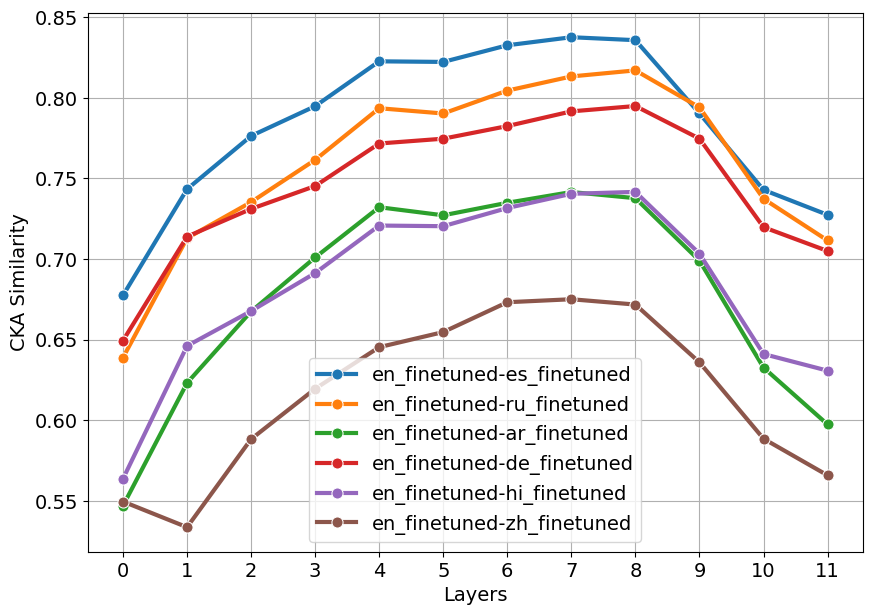

In [6]:
from cross_lingual_subnets.visualization import cka_layer_by_layer

full_full_df = cka_layer_by_layer(
    full_sub=full_sub,
    exp_name1="finetuned",
    exp_name2="finetuned",
    source="en",
    savename=f"cka_en_other_langs_full_vs_full.pdf",
    legend=True,
)
full_full_df.to_csv(f"full_full_df.csv", index=False)

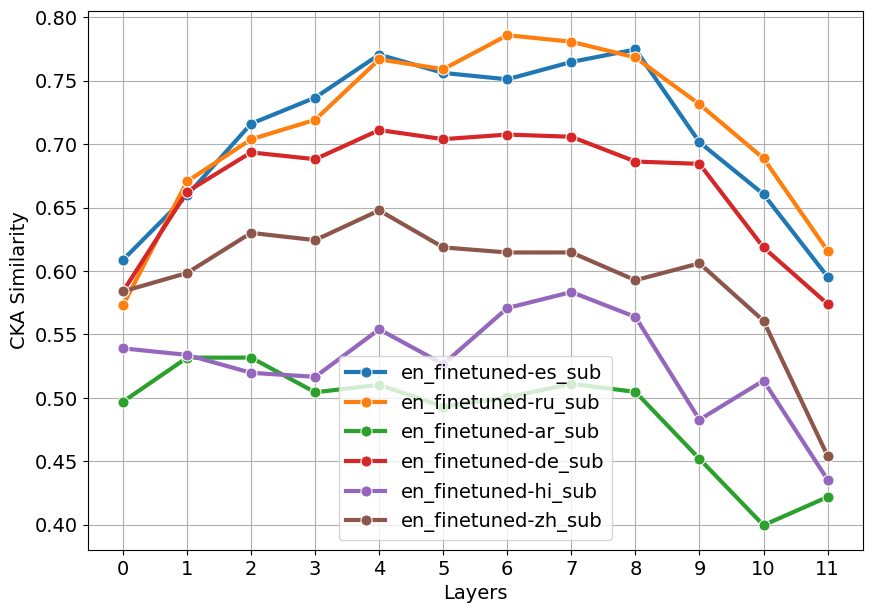

In [8]:
full_sub_df = cka_layer_by_layer(
    full_sub=full_sub,
    exp_name1="finetuned",
    exp_name2="sub",
    source="en",
    savename=f"cka_en_other_langs_full_vs_{PRUNED_PCTG}_sub.pdf",
    legend=True,
)
full_sub_df.to_csv(f"full_sub_df.csv", index=False)

In [9]:
# Free up RAM
del full_sub

In [10]:
from cross_lingual_subnets.visualization import load_encodings_one_source_sub

PATH_TO_SUB_ENCODINGS = "encodings_50/"
PRUNED_PCTG = PATH_TO_SUB_ENCODINGS.split("_")[1][:-1]
sub = load_encodings_one_source_sub(
    path_to_sub_encodings=PATH_TO_SUB_ENCODINGS, source="en", max_length=None
)

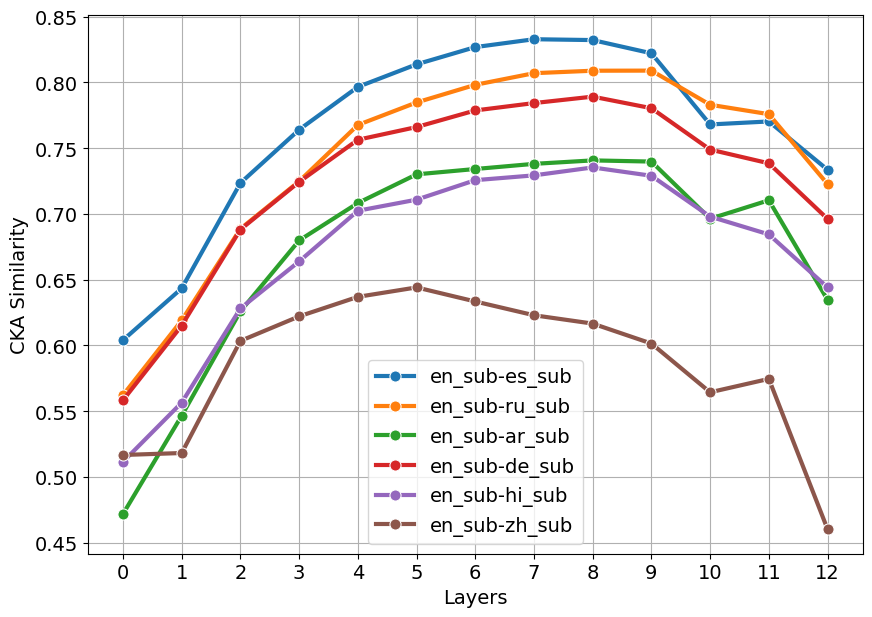

In [11]:
from cross_lingual_subnets.visualization import cka_layer_by_layer

en_sub_df = cka_layer_by_layer(
    full_sub=sub,
    exp_name1="sub",
    exp_name2="sub",
    source="en",
    savename=f"cka_{PRUNED_PCTG}_from_eng_sub_to_other_langs.pdf",
    legend=True,
    # title="Subnetwork cross-lingual representation similarity over layers",
)
en_sub_df.to_csv(f"{PRUNED_PCTG}_en_sub_sub_df.csv", index=False)

## Barplots of differences of similarity

In [12]:
import pandas as pd


def compute_diff_df(df1, df2):
    diff_df = (df1.to_numpy() - df2.to_numpy()).T

    new_df = pd.DataFrame()
    for i, col in enumerate(df1):
        colname = col.replace("_finetuned", "").replace("_sub", "")
        new_df[colname] = diff_df[i]

    return new_df

In [16]:
# Instead of computing, load the results
# full_full_df = pd.read_csv("full_full_df.csv")
# en_sub_df = pd.read_csv("50_en_sub_sub_df.csv")
en_sub_df = en_sub_df.drop(0).reset_index().drop("index", axis=1)

In [17]:
new_df = compute_diff_df(full_full_df, en_sub_df)

[2024-05-31 19:39:49,552] [INFO] [matplotlib.category:category.py:223] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2024-05-31 19:39:49,561] [INFO] [matplotlib.category:category.py:223] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2024-05-31 19:39:49,644] [INFO] [matplotlib.category:category.py:223] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2024-05-31 19:39:49,653] [INFO] [matplotlib.category:category.py:223] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to

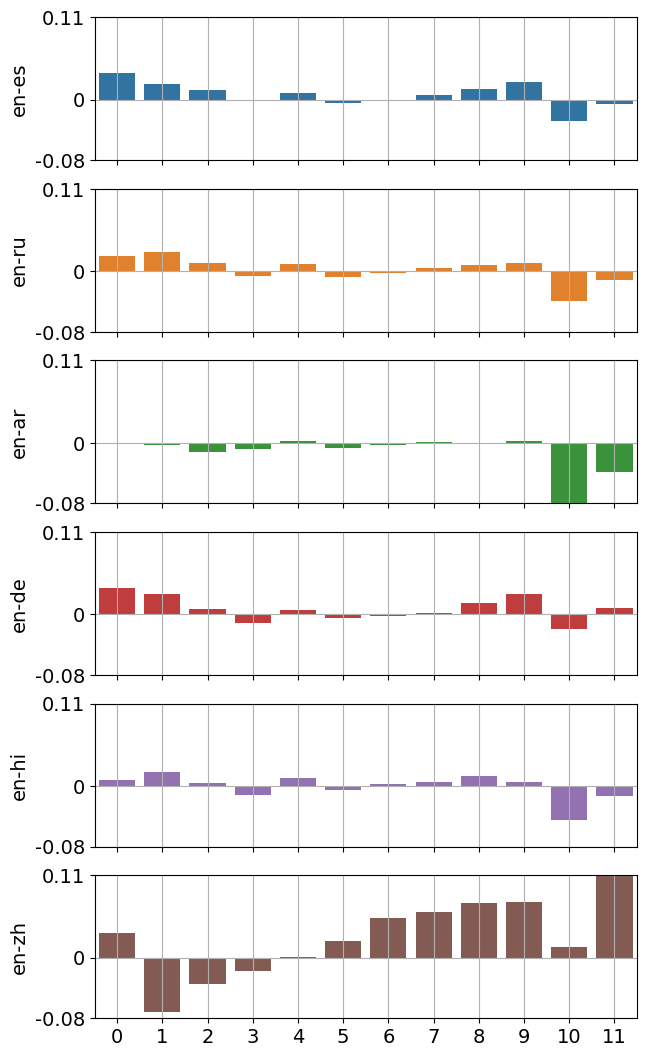

In [18]:
from cross_lingual_subnets.visualization import cka_diff_barplots

cka_diff_barplots(
    new_df.T,
    savename=f"cka_{PRUNED_PCTG}_en_sub_diff_barplots.pdf",
    figsize=(7, 13),
)

[2024-05-31 19:40:42,038] [INFO] [matplotlib.category:category.py:223] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2024-05-31 19:40:42,045] [INFO] [matplotlib.category:category.py:223] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2024-05-31 19:40:42,124] [INFO] [matplotlib.category:category.py:223] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[2024-05-31 19:40:42,139] [INFO] [matplotlib.category:category.py:223] Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to

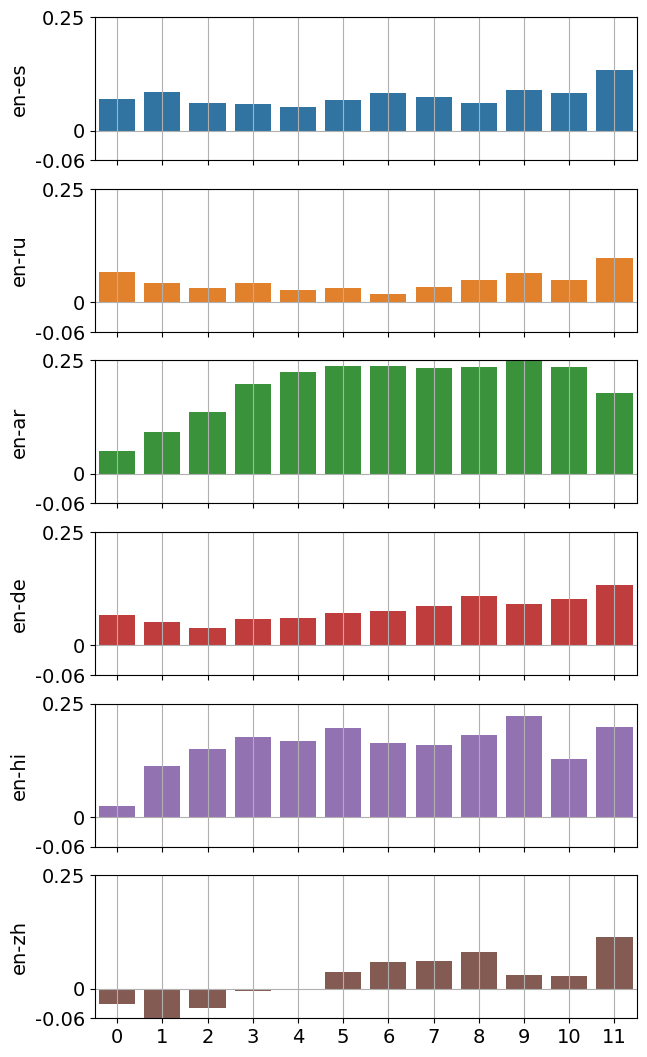

In [19]:
new_df = compute_diff_df(full_full_df, full_sub_df)

cka_diff_barplots(
    new_df.T,
    savename=f"cka_full_{PRUNED_PCTG}_sub_diff_barplots.pdf",
    figsize=(7, 13),
)